# Sunrise and Sunset

This notebook takes the data from:

```
https://aa.usno.navy.mil/data/docs/RS_OneYear.php
```

and generates a csv file in ISO format for use by the system.

In [11]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib notebook

In [ ]:
records = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}

def updateRow(line: str):
    record = line.replace('             ', '  xxxx xxxx  ') \
                 .replace('  ',' ') \
                 .replace('\n','') \
                 .split(' ') 
    if len(record) == 25 and record[0].isnumeric():
        for i in range(0, 12):
            if record[i * 2 + 1] != 'xxxx':
                records[i + 1].append((record[i * 2 + 1], record[i * 2 + 2]))

def hourMinute(record):
    minute = int(record[-2:])
    hour = int(record[:-2])
    return hour, minute
        
with open('sunriseSunset.txt') as f:
    line = f.readline()
    while line:
        updateRow(line)
        line = f.readline()
        
with open('sunriseSunset.csv', 'w') as f:
    f.write('sunrise,sunset in GMT\n')
    for month, time in records.items():
        for i in range(0, len(time)):
            upHour, upMinute = hourMinute(time[i][0])
            downHour, downMinute = hourMinute(time[i][1])
            upDate = datetime(2000, month, i + 1, upHour, upMinute) - timedelta(hours=-8)
            downDate = datetime(2000, month, i + 1, downHour, downMinute) - timedelta(hours=-8)
            f.write(upDate.isoformat() + ',' + downDate.isoformat() + '\n')
    

In [23]:
dates = pd.read_csv('sunriseSunset.csv', parse_dates=[0, 1], infer_datetime_format=True)

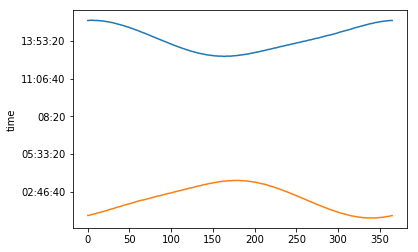

In [33]:
dates['sunriseTimes'] = dates['sunrise'].map(lambda x: x.time())
dates['sunsetTimes'] = dates['sunset'].map(lambda x: x.time())
plt.plot(dates[['sunriseTimes','sunsetTimes']])